<a href="https://colab.research.google.com/github/Rkjha6634/Customer_Churn_Predection/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [100]:
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [101]:
df.drop('customerID',axis=1 ,inplace=True)

In [102]:
for item in df.columns:
  print(item)
  print('--------------------')
  print(df[item].value_counts())
  print('---------------------')

gender
--------------------
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------
SeniorCitizen
--------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------
Partner
--------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------
Dependents
--------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------
tenure
--------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------
PhoneService
--------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------
MultipleLines
--------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------
InternetService
--------------------
Fiber optic    3096
DSL            2421
No             

In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'PaperlessBilling',
                      'Churn',


                      ]

for item in columns_to_convert:
    df[item].replace(to_replace='Yes', value=1, inplace=True)
    df[item].replace(to_replace='No',  value=0, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [105]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [106]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [108]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

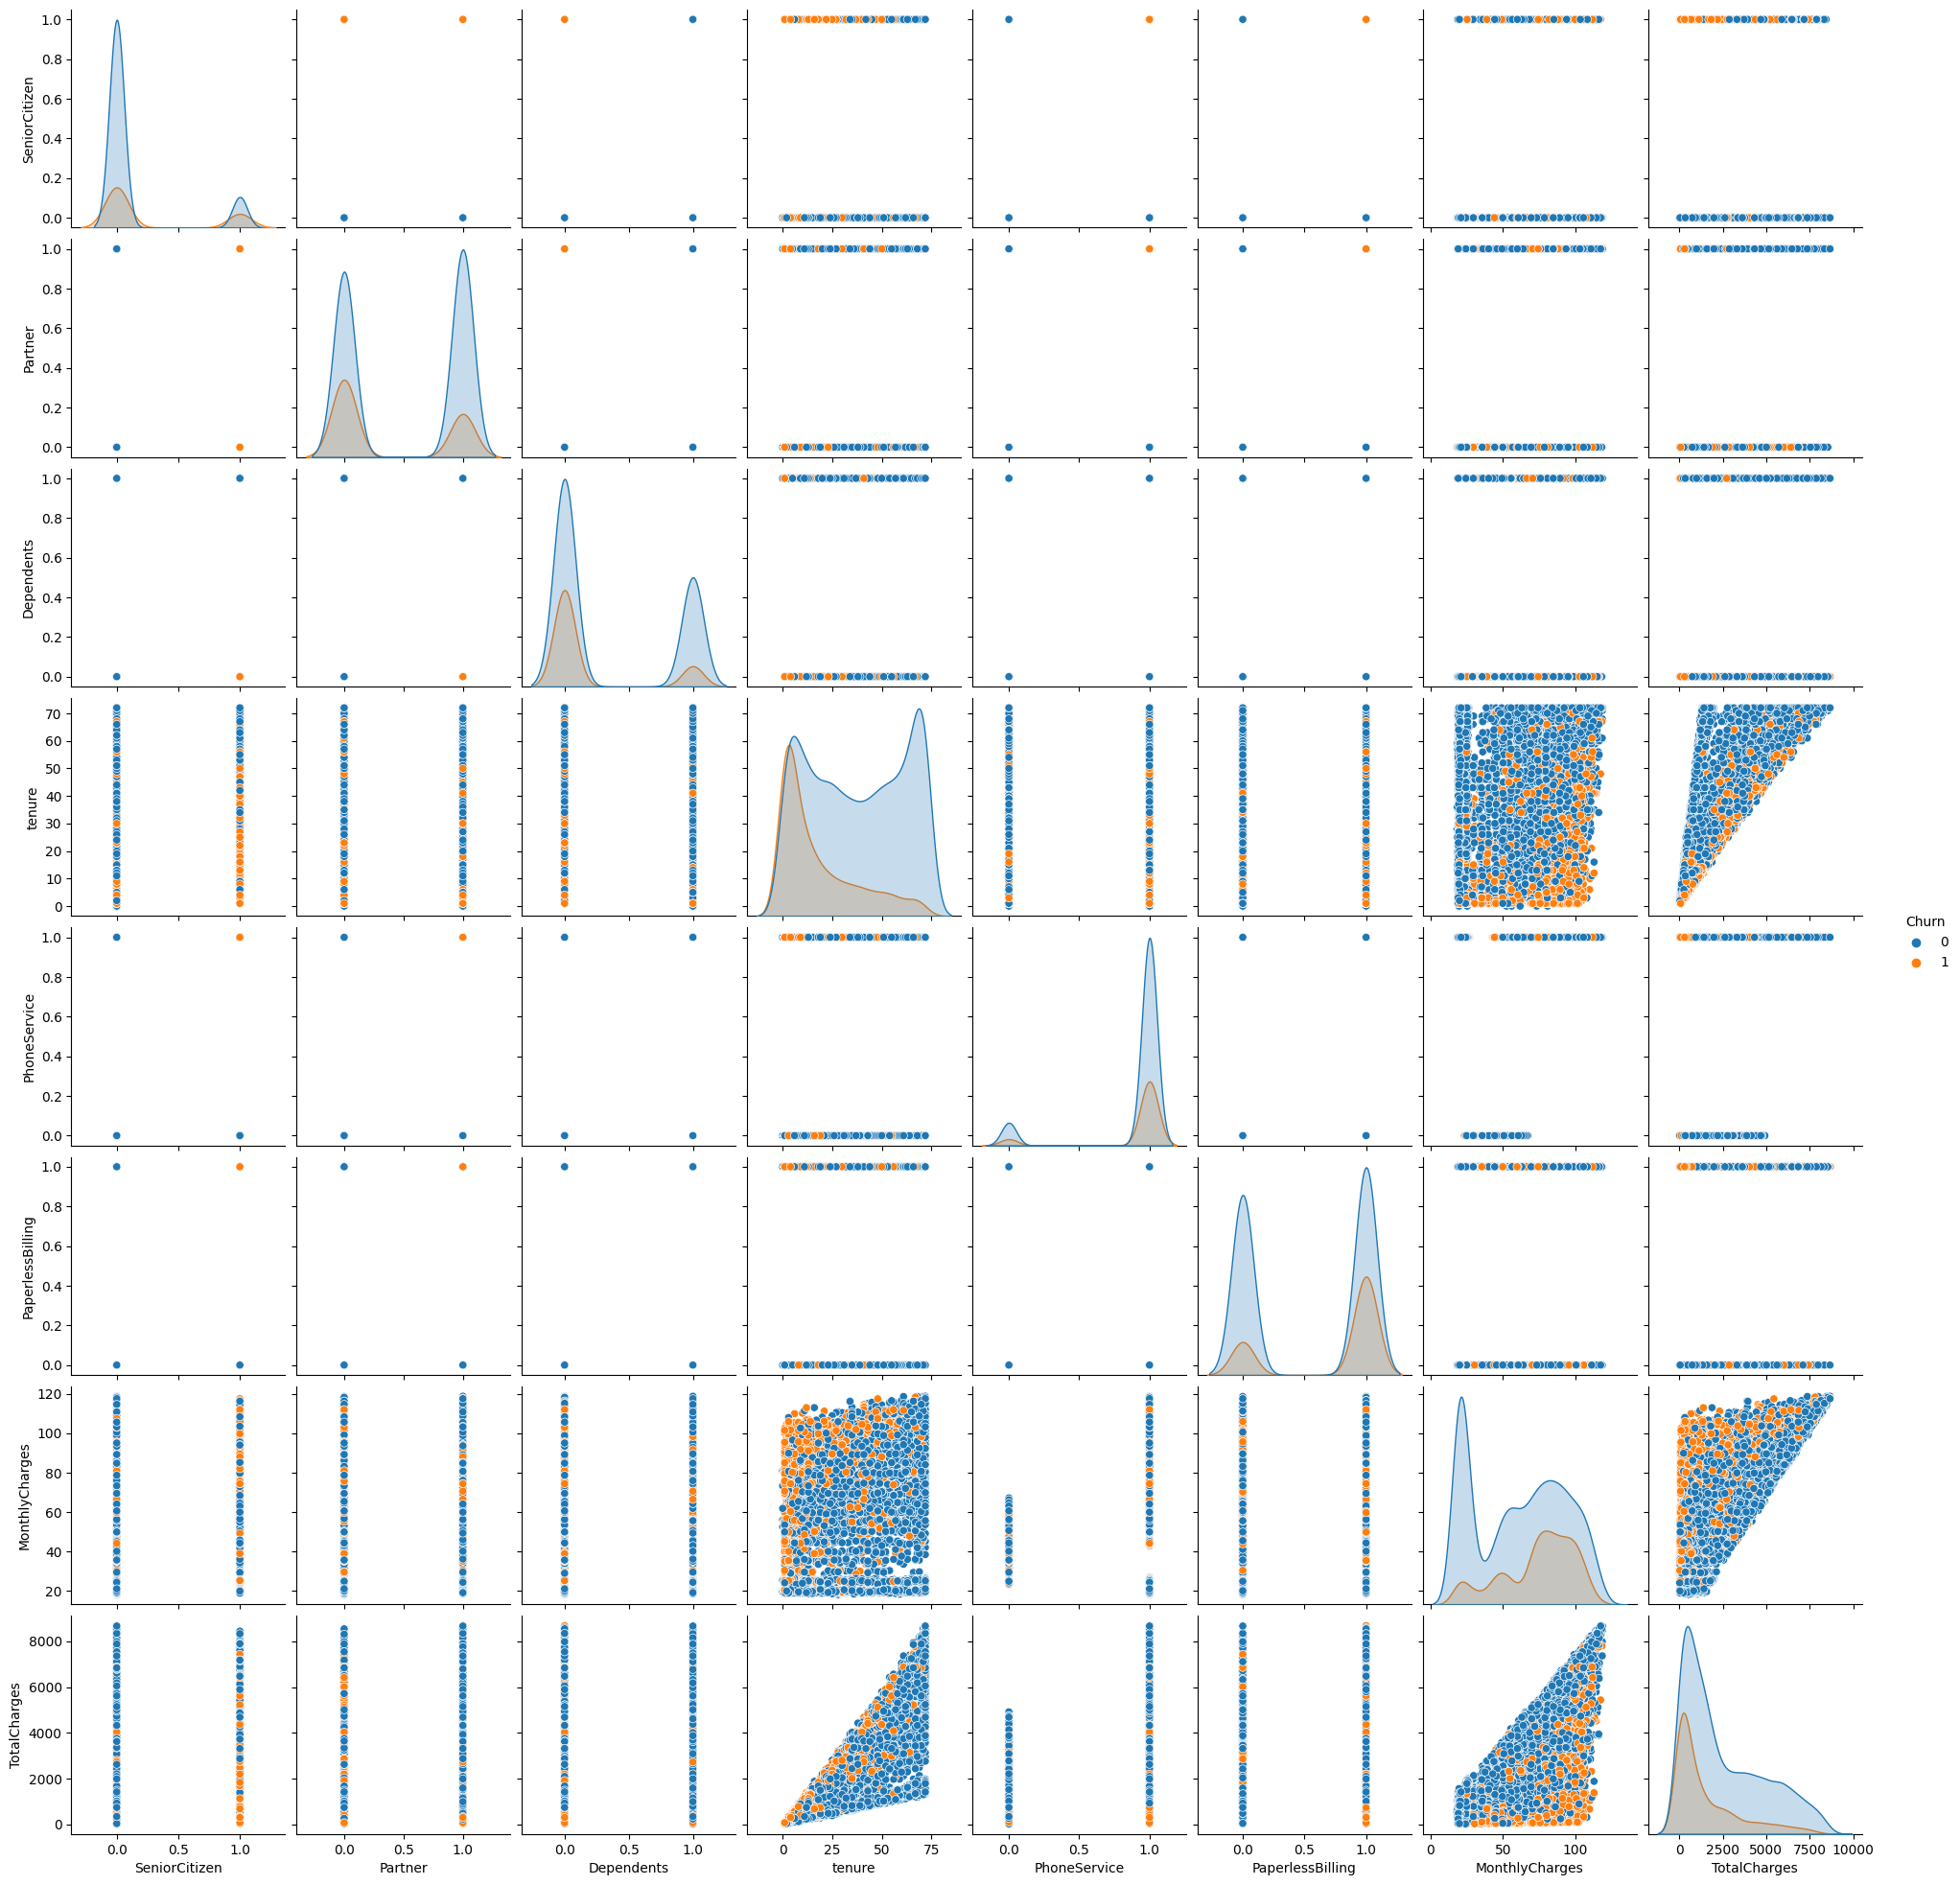

In [111]:
sns.pairplot(df, hue='Churn')
plt.show()

In [112]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [113]:
countplot_col = ['SeniorCitizen','Partner','Dependents','PhoneService' , 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
                  ,'Contract','PaperlessBilling','PaymentMethod','Churn']

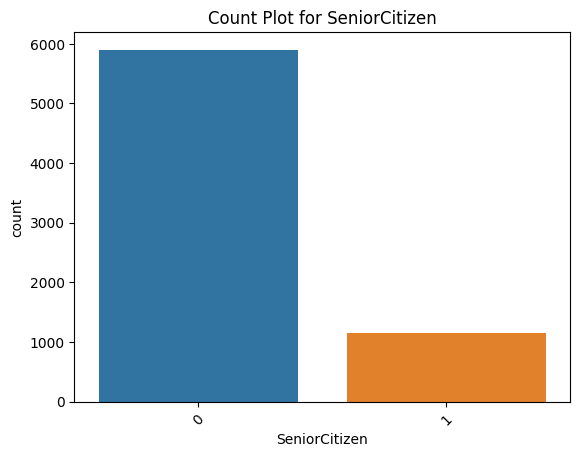

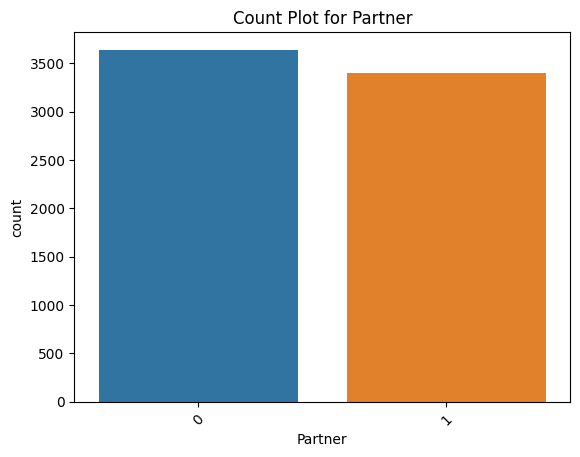

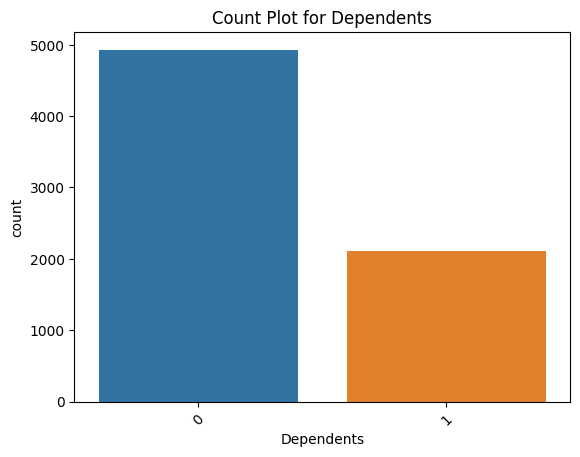

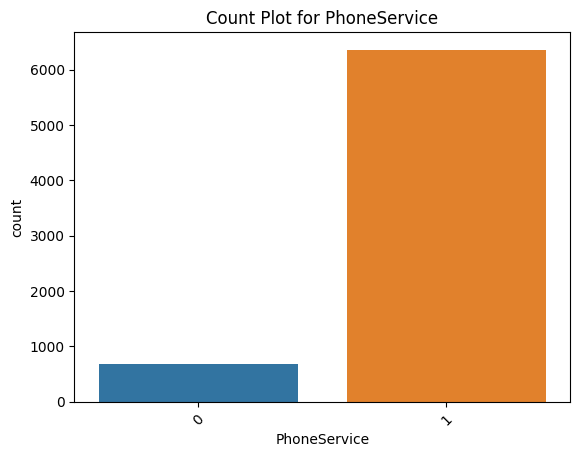

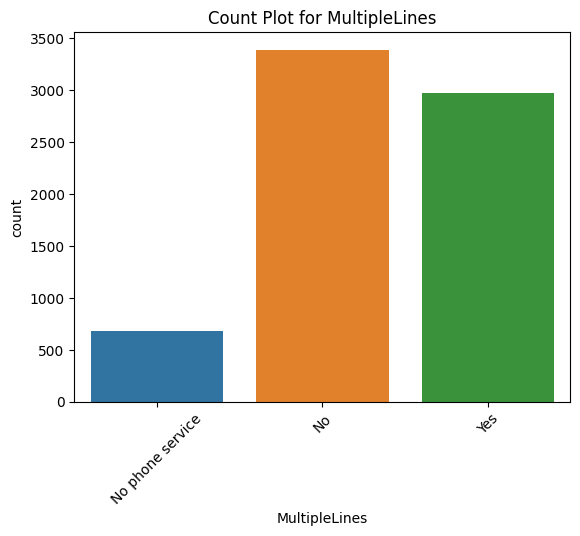

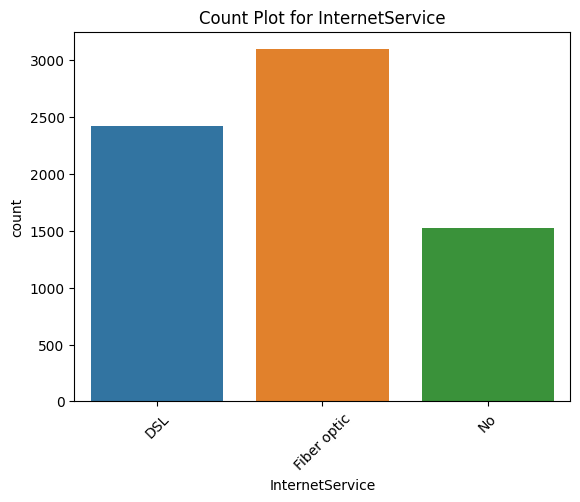

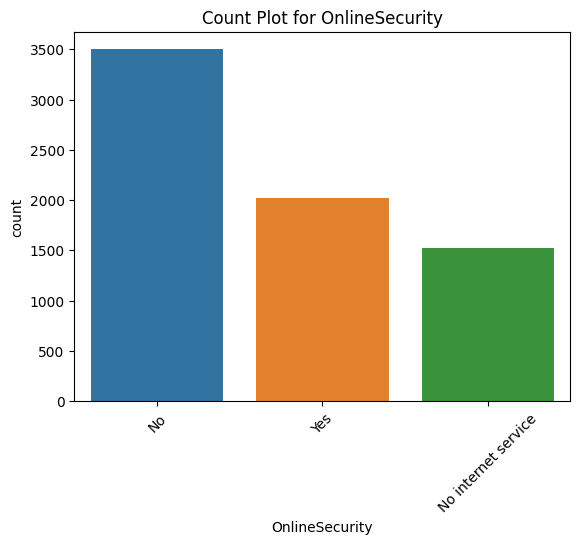

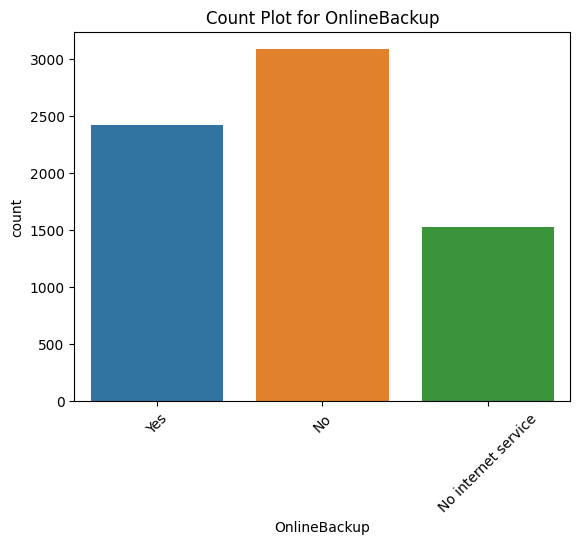

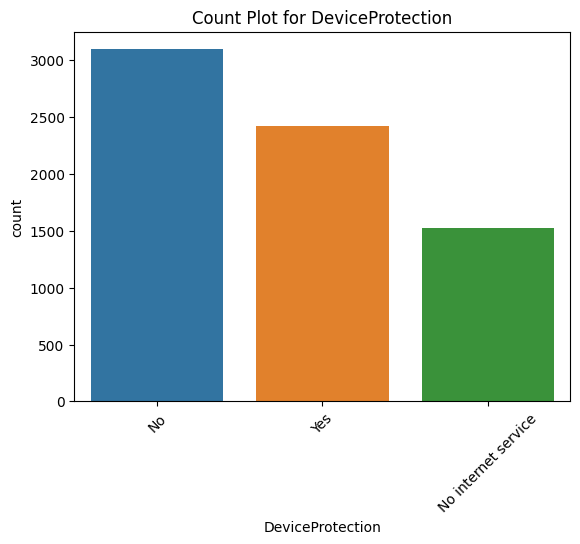

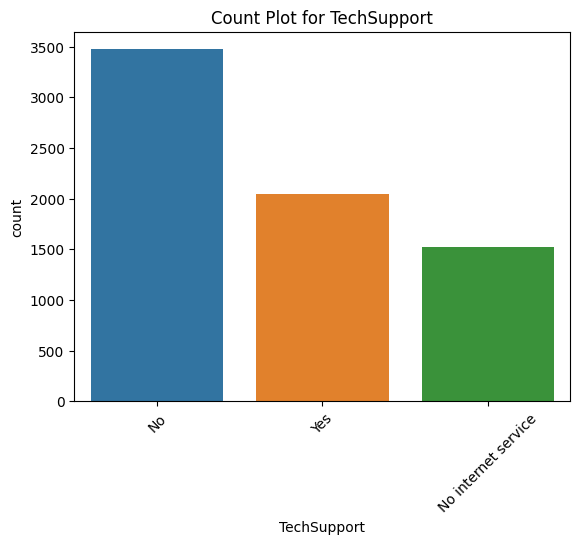

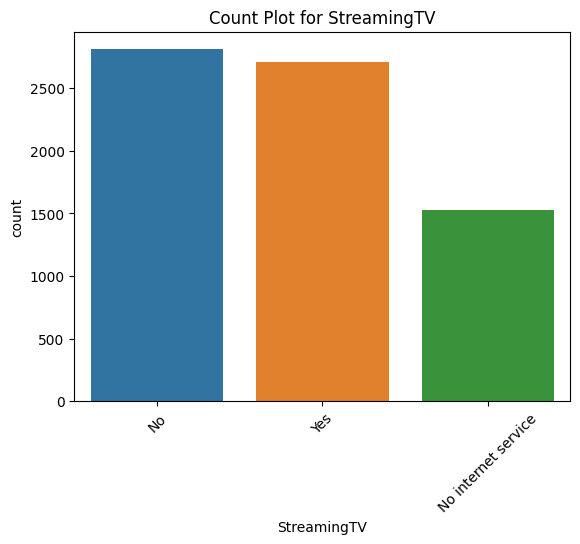

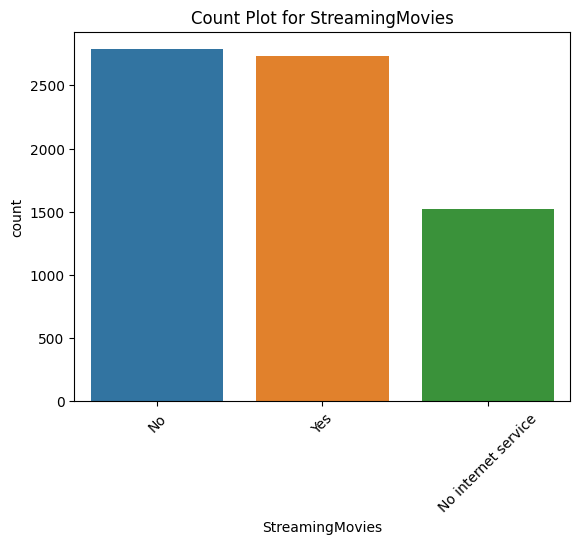

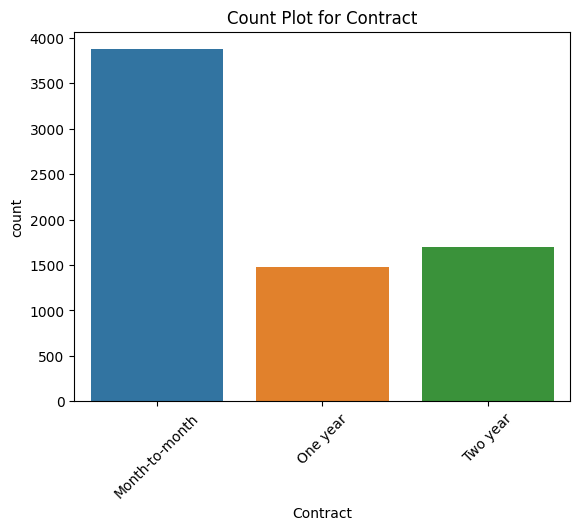

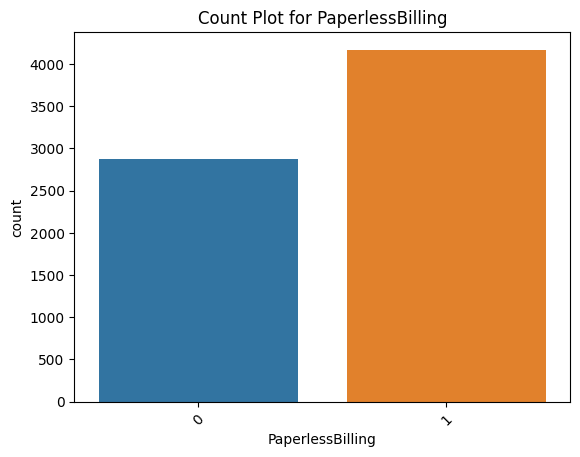

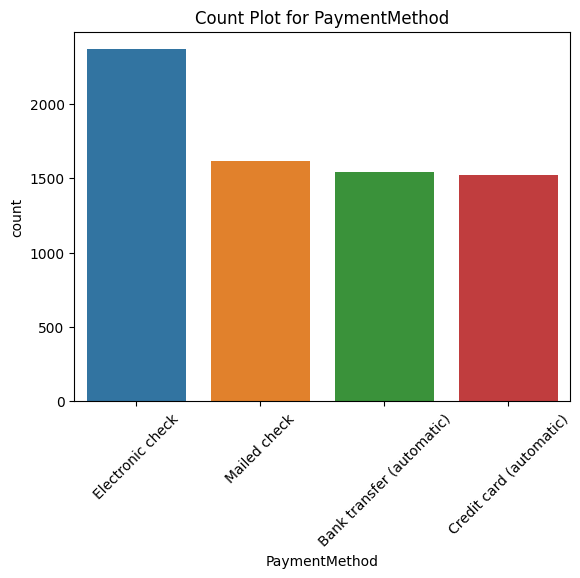

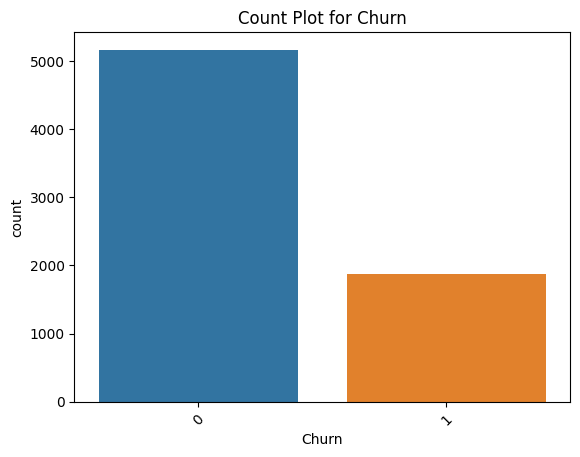

In [114]:
for item in countplot_col:
  sns.countplot(data=df,x=item)
  plt.title(f'Count Plot for {item}')
  plt.xticks(rotation=45)
  plt.show()

In [115]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [116]:
df = df.fillna(value=0)

In [117]:
corr = df.corr()

<ipython-input-117-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

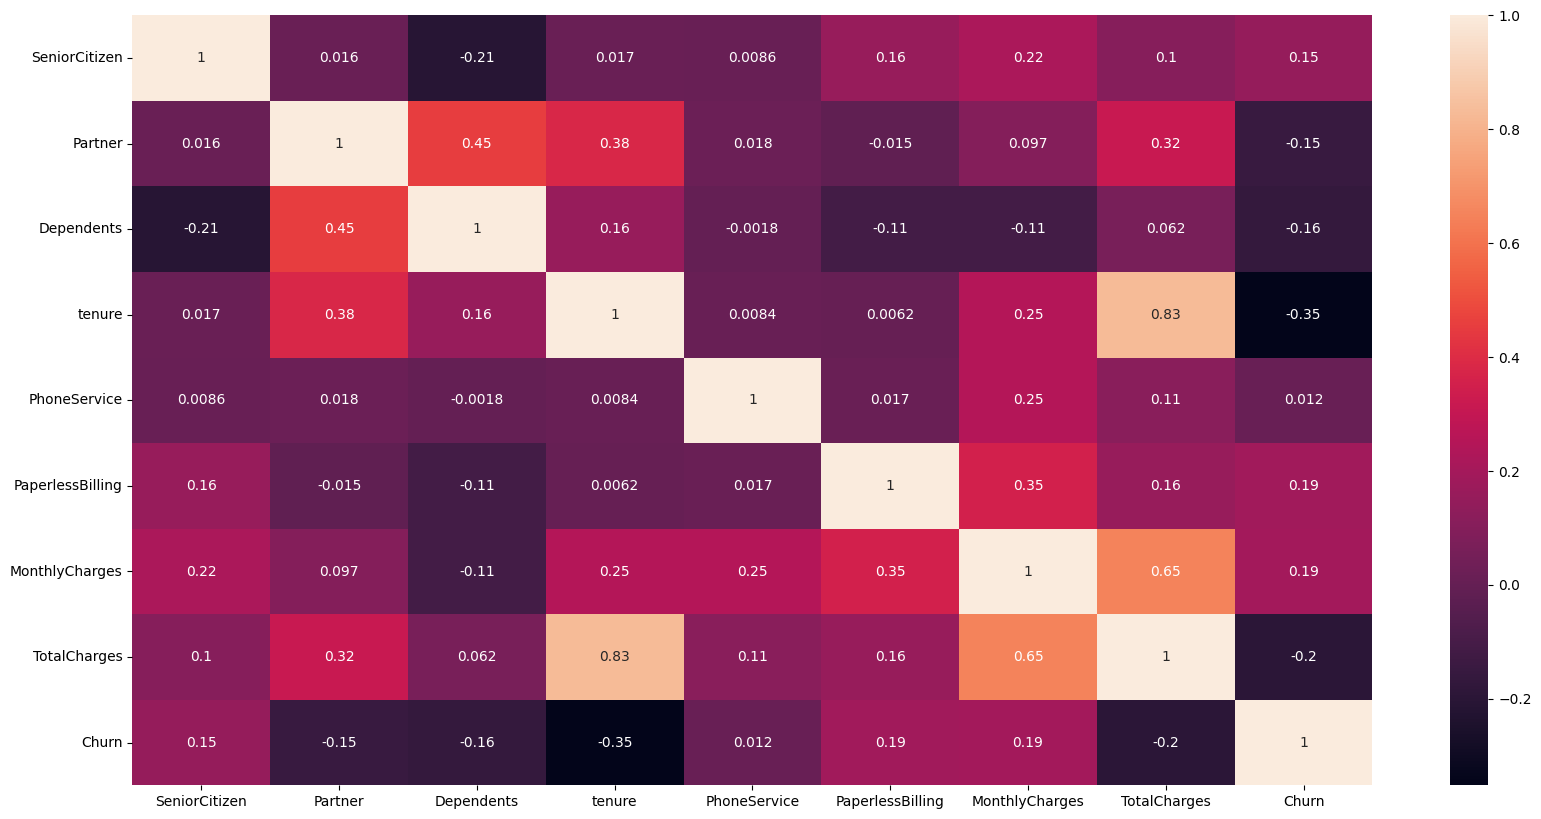

In [118]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(data=corr,annot=True)

In [119]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [94]:
df['StreamingTV'].value_counts()

0                      2810
1                      2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [81]:
cat_cols = ['gender','MultipleLines','InternetService','Contract','PaymentMethod']

In [120]:
df = pd.get_dummies(data = df , columns = ['gender','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [121]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,0,1,0,0,1,0,0,1,0,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_Female                            7043 non-null   uint8  
 10  gender_Male                              7043 no

In [124]:
x = df.drop('Churn',axis=1)
y= df['Churn']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 41)
X_test shape: (1409, 41)
y_train shape: (5634,)
y_test shape: (1409,)


In [127]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
2142,0,0,1,21,1,0,64.85,1336.80,1,0,...,1,1,0,0,1,0,0,0,0,1
1623,0,0,0,54,1,1,97.20,5129.45,1,0,...,0,1,0,0,0,0,1,0,0,1
6074,0,1,0,1,0,1,23.45,23.45,0,1,...,0,1,0,0,1,0,0,1,0,0
1362,0,0,0,4,1,1,70.20,237.95,0,1,...,0,1,0,0,1,0,0,1,0,0
6754,0,0,1,0,1,1,61.90,0.00,0,1,...,0,0,0,1,1,0,0,1,0,0


In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [129]:
X_train_scaled

array([[-0.4377492 , -0.96957859,  1.53218588, ..., -0.8072887 ,
        -0.52408075,  1.25076217],
       [-0.4377492 , -0.96957859, -0.65266232, ..., -0.8072887 ,
        -0.52408075,  1.25076217],
       [-0.4377492 ,  1.03137591, -0.65266232, ...,  1.23871423,
        -0.52408075, -0.79951251],
       ...,
       [-0.4377492 ,  1.03137591,  1.53218588, ..., -0.8072887 ,
         1.9081029 , -0.79951251],
       [ 2.28441306, -0.96957859, -0.65266232, ..., -0.8072887 ,
        -0.52408075,  1.25076217],
       [-0.4377492 , -0.96957859, -0.65266232, ..., -0.8072887 ,
         1.9081029 , -0.79951251]])

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8204400283889283
Precision: 0.6840490797546013
Recall: 0.5978552278820375
F1-score: 0.6380543633762518
Confusion Matrix:
 [[933 103]
 [150 223]]


In [141]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()

rmodel.fit(X_train_scaled, y_train)

y_pred = rmodel.predict(X_test_scaled)

raccuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", raccuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.794889992902768
Precision: 0.6521739130434783
Recall: 0.48257372654155495
F1-score: 0.5546995377503852
Confusion Matrix:
 [[940  96]
 [193 180]]


In [145]:
from sklearn.tree import DecisionTreeClassifier

dmodel = DecisionTreeClassifier(random_state=42)

dmodel.fit(X_train_scaled, y_train)

y_pred = dmodel.predict(X_test_scaled)

daccuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", daccuracy)


Accuracy: 0.7139815471965933


In [143]:
import xgboost as xgb

xmodel = xgb.XGBClassifier(random_state=42)

xmodel.fit(X_train_scaled, y_train)

y_pred = xmodel.predict(X_test_scaled)

xaccuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", xaccuracy)

Accuracy: 0.7955997161107168


In [144]:
from sklearn.svm import SVC

smodel = SVC(random_state=42)

smodel.fit(X_train_scaled, y_train)

y_pred = smodel.predict(X_test_scaled)

saccuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", saccuracy)

Accuracy: 0.815471965933286


In [150]:
print("Logistic Regression:", accuracy)
print("RandomForest:",raccuracy)
print("DecisionTree:",daccuracy)
print("xgboost:",xaccuracy)
print("SVM:",saccuracy)

Logistic Regression: 0.815471965933286
RandomForest: 0.794889992902768
DecisionTree: 0.7139815471965933
xgboost: 0.7955997161107168
SVM: 0.815471965933286


HERE BY CHECHING ALL THE MODELS AND THIER ACCURACY SCORE LOGISTIC REGRESSION AND SVM HAS THE SAME ACCCURACY ,EITHER OF THEM CAN BE CHOOSEN THO BUILD A MODEL
